In [6]:
import numpy as np
import onnx
import onnxruntime as ort
import torch
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
print(Path.cwd())

c:\Users\vh\Documents\Projektmodul\Valentin macht alles neu\unified


In [3]:
x = np.arange(14, dtype=np.float32)
u = np.arange(1, dtype=np.float32)
y = np.arange(1, dtype=np.float32)
print(x.dtype, u.dtype, y.dtype)
print(y)
ort_sess = ort.InferenceSession('onnx/full.onnx')
outputs = ort_sess.run(None, {'state': x, 'input' :u, 'last_output': y})
outputs

float32 float32 float32
[0.]


[array([ 0.79454315,  2.177829  ,  2.780247  ,  4.124152  ,  4.929967  ,
         5.886008  ,  6.8025293 ,  8.22473   ,  9.477996  , 10.087538  ,
        11.286423  , 11.772464  , 12.950461  , -0.16208754], dtype=float32)]

100%|██████████| 5999/5999 [00:01<00:00, 3134.58it/s]


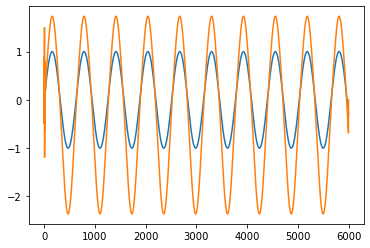

In [8]:
a1 = 0.2887782454
a2 = 0.0885757059
b = -0.2055


u_saved = np.zeros(6000, dtype=np.float32)
controlled_input = np.zeros(6000, dtype=np.float32)
x = np.zeros(14, dtype = np.float32)
sinewave = np.sin(np.arange(0, 60, 0.01), dtype=np.float32)

y = []
for i in tqdm(range(5999)):
    # print(x[0])
    y.append(x[0])
    controlled_input = np.array([((sinewave[i]-x[1] -x[0] * a2 - b)/a1).astype('float32')])
    u_saved[i] = controlled_input
    last_output = np.array([x[0]])
    # print(controlled_input)
    # print(x.dtype, last_output.dtype, controlled_input.dtype)
    out = ort_sess.run(None, {'state': x, 'input' :controlled_input, 'last_output': last_output})
    x = out[0]

plt.plot(y)
plt.plot(u_saved)